### Лабораторная работа №4
####  Исследование абсолютно-оптимальных рекуррентных алгоритмов

Для оценки эффективности абсолютно-оптимальных алгоритмов рассмотрим задачу идентификации параметров линейного регрессионного объекта вида:
\begin{equation}y(i)=с_{0}+с_{1}u_{1}(i)+...+с_{4}u_{4}(i)+\eta(i)\end{equation}

Пусть шум измерений $\eta(i)$ имеет распределение Коши:
\begin{equation*}
f(\eta)=\frac{1}{\pi s}\frac{1}{(1+(\eta/s)^2)}
\end{equation*}

In [50]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [51]:
# параметры объекта 
c0=1.9
c1=-0.9
c2=0.8
c3=0
c4=2.5

In [52]:
# количество измерений
N=200

In [53]:
np.random.seed(42)

In [64]:
# параметр распределения Коши
s=10

In [65]:
Noise=st.cauchy.rvs(loc=0, scale=s, size=N)

In [66]:
Avg_U1=1
Var_U1=50
Avg_U2=1
Var_U2=50
Avg_U3=1
Var_U3=50
Avg_U4=1
Var_U4=50

In [67]:
# моделирование входов объекта
U1=np.random.normal(Avg_U1,Var_U1,size=N)
U2=np.random.normal(Avg_U2,Var_U2,size=N)
U3=np.random.normal(Avg_U3,Var_U3,size=N)
U4=np.random.normal(Avg_U4,Var_U4,size=N)

In [68]:
# моделирование выхода объекта
y=c0+c1*U1+c2*U2+c3*U3+c4*U4+Noise
print(y)

[ -29.97056152   17.15204926   32.2808903   -19.38262238   83.95315276
  287.98055385  158.96967369 -199.82855551  173.10182505   24.00666605
 -239.41922636  129.09008808  -58.25296475  -71.72623219 -127.82360814
  -79.02550447   98.93415307 -101.05604531   34.40913888  -60.95313363
   39.19371797  128.01388702 -176.96105635  110.38946769 -127.60365552
  133.22200931  -44.19050254  245.90948624   14.26316531    3.94362001
  -86.06155533    4.20637388 -152.57186363 -297.78189182 -208.98455838
  -86.66287684   83.92828378  185.71707314   18.08443217  -57.31537155
   49.36295704  111.58192462  -66.46190327  -55.22938233   62.86248986
  407.63167504 -119.25587402  158.51847634 -331.90349103  121.24216645
  -25.15150675 -460.29664532  -34.81580981   27.48086009  -39.06576815
   32.65139697    6.97933233  150.93382743  317.80002979   -5.43297844
   83.19746708 -154.05409109  -10.79331624 -230.98603182  195.0649512
 -109.72987784  -20.22525818    7.02082613 -131.76349847  321.22773632
 -193.7

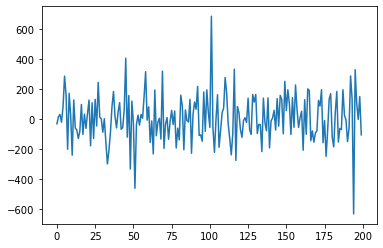

In [69]:
plt.plot(y)
plt.show()

#### Формирование алгоритма идентификации

В зависимости от того, насколько хорошо изучен «объект» идентификации, могут возникнуть следующие ситуации:

1. Объект изучен хорошо, правильно определена плотность распределения шума, т.е. принятая и реальная плотности распределения совпадают и на основе принятой функции распределения формируется оптимальная функция потерь.


2. Объект изучен плохо. При этом, как правило, считают, что плотность распределения шума соответствует нормальному закону распределения, хотя на самом деле(в данном случаем, см. описание объекта выше) шум имеет распределение Коши. Таким образом, опираясь на ложную гипотезу о нормальном распределении шума, в качестве функции потерь выбирается квадратичная функция.

Предлагается реализовать абсолютно-оптимальный рекуррентный алгоритм оценивания параметров объекта для каждой из ситуаций. Для   оценки   эффективности использования абсолютно-оптимальных  рекуррентных  алгоритмов  проводилось сравнение сглаженной ошибки оценки параметров объекта,определенных когда объект изучили хорошо и когда плохо, при  различных  значениях  параметра  распределения Коши — s.

#### В первом случае рекуррентный алгоритм принимает вид:
\begin{equation}\hat{\vec{c}}(i)=\hat{\vec{c}}(i-1)+Г(i)\frac{2(y(i)-\hat{c}_{0}(i-1)u_{0}(i)-...-\hat{c}_{4}(i-1)u_{4}(i))}{s^2+(y(i)-\hat{c}_{0}(i-1)u_{0}(i)-...-\hat{c}_{4}(i-1)u_{4}(i))^2}\vec{z}(i) \\
Г(i)=Г(i-1)-\frac{Г(i-1)\vec{z}(i)\vec{z}(i)^TГ(i-1)}{2s^2+\vec{z}^T(i)Г(i-1)\vec{z}(i)} \\
Г(0)=\lambda I, \lambda=0.1\\
\hat{\vec{c}}(0)=\vec{c}_{0}\end{equation}

In [70]:
# Ваш код здесь ...
lambd = 0.1
G = np.eye(5)*lambd

c = np.empty((N,5))
c[0] = [c0, c1, c2, c3, c4]
c[0] += 0.1

for i in range(1,N):
    z = np.asmatrix([1, U1[i], U2[i], U3[i], U4[i]]).transpose()
    G = G - (G*z*z.transpose()*G)/(2*s**2+z.transpose()*G*z)
    c[i] = c[i-1] + (G*(2*(y[i]-c[i-1][0]-c[i-1][1]*U1[i]-c[i-1][2]*U2[i]-c[i-1][3]*U3[i]-c[i-1][4]*U4[i]))/(s**2+(y[i]-c[i-1][0]-c[i-1][1]*U1[i]-c[i-1][2]*U2[i]-c[i-1][3]*U3[i]-c[i-1][4]*U4[i])**2)*z).transpose()
    
print(c[N-1])

[ 2.04298348 -0.92791479  0.8321904   0.0306391   2.46661269]


#### Во втором случае рекуррентный алгоритм принимает вид:
\begin{equation}\hat{\vec{c}}(i)=\hat{\vec{c}}(i-1)+Г(i)\vec{z}(i)(y(i)-\hat{c}_{0}(i-1)u_{0}(i)-...-\hat{c}_{4}(i-1)u_{4}(i)) \\
Г(i)=Г(i-1)-\frac{Г(i-1)\vec{z}(i)\vec{z}(i)^TГ(i-1)}{1+\vec{z}^T(i)Г(i-1)\vec{z}(i)} \\
Г(0)=\lambda I , \lambda=0.1    \\
\hat{\vec{c}}(0)=\vec{c}_{0}\end{equation}

In [71]:
# Ваш код здесь ...
c_2 = np.empty((N,5)) 
c_2[0] = [c0, c1, c2, c3, c4]
c_2[0] += 0.1

for i in range(1,N):
    z = np.asmatrix([1, U1[i], U2[i], U3[i], U4[i]]).transpose()
    G = G - (G*z*z.transpose()*G)/(1+z.transpose()*G*z)
    c_2[i] = c_2[i-1] + (G*z*(y[i]-c_2[i-1][0]-c_2[i-1][1]*U1[i]-c_2[i-1][2]*U2[i]-c_2[i-1][3]*U3[i]-c_2[i-1][4]*U4[i])).transpose()
    
print(c_2[N-1]) 

[ 1.79096309 -1.05205969  0.98363021  0.02736983  2.3785898 ]


Сглаженная ошибка оценки вычисляется по формуле:
\begin{equation*}
err_{сгл}=\sqrt{\frac{\sum_{j=1}^{10}\sum_{k=0}^4(\hat{c}_{k}(i-j)-c_{k})^2}{10}} ; i=10,11,12...
\end{equation*}

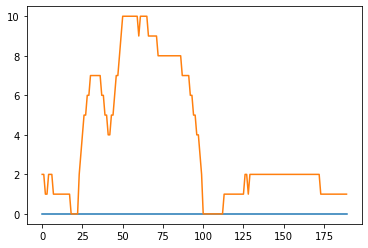

In [72]:
# Ваш код здесь ...
err1 = np.array(range(N-10))
err2 = np.array(range(N-10))
c_ist = [c0,c1,c2,c3,c4]
sqr1 = 0
sqr2 = 0

for i in range(10,N):
    sqr1 = 0
    sqr2 = 0
    for j in range(1,10):
        for k in range(0,4):
            sqr1 += (c[i-j][k]-c_ist[k])**2
            sqr2 += (c_2[i-j][k]-c_ist[k])**2
    err1[i-10] = (sqr1/10)**0.5
    err2[i-10] = (sqr2/10)**0.5
plt.plot(err1)
plt.plot(err2)
plt.show()